In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from dateutil.parser  import parse
import datetime as dt
import matplotlib.dates as mdates
import matplotlib as mpl


plt.style.use('../enerdata.mplstyle')


# colores
azulier     = "#1A3D6F"
doradoier  = '#C65C25' 

In [2]:
f = '../../data/independencia.csv'
ind = pd.read_csv(f,index_col=0,parse_dates=True)
ind['Año'] = ind.index.year.astype(str)
# ind.index

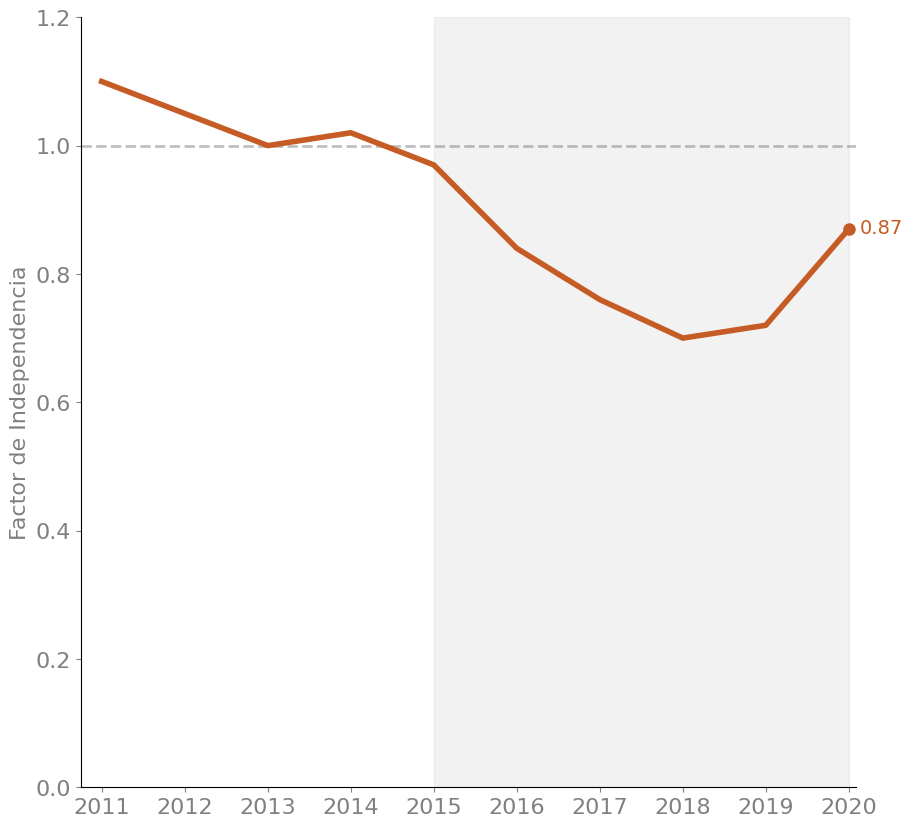

In [3]:

plt.style.use('../enerdata.mplstyle')
fig, ax = plt.subplots()

#Grafica datos
ax.axhline(y=1,alpha=0.5,ls='--',lw=2)
ax.plot(ind.Factor,'-o',color=doradoier,markevery=[-1])

#Texto 
xy =  (mdates.date2num(dt.datetime(2019, 12, 31)),0.87)
ax.annotate('0.87', xy, xytext=(8,-3), 
            textcoords='offset points',
            color=doradoier,
           fontsize=14)


#Separaci'on por medio de background
ax.axvspan(parse("2014-12-31"),
           parse("2019-12-31"),
           alpha=0.1,color='gray')


#Etiquetas y texto
ax.set_ylabel("Factor de Independencia")

# Formato de gr'afica
ax.set_ylim(0,1.2)
ax.set_xlim(parse("2010-10-01"),parse("2020-02-01"))
ax.xaxis.set_major_locator(mdates.YearLocator(base=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.spines[['top','right']].set_visible(False)

fig.savefig('Independencia.png')


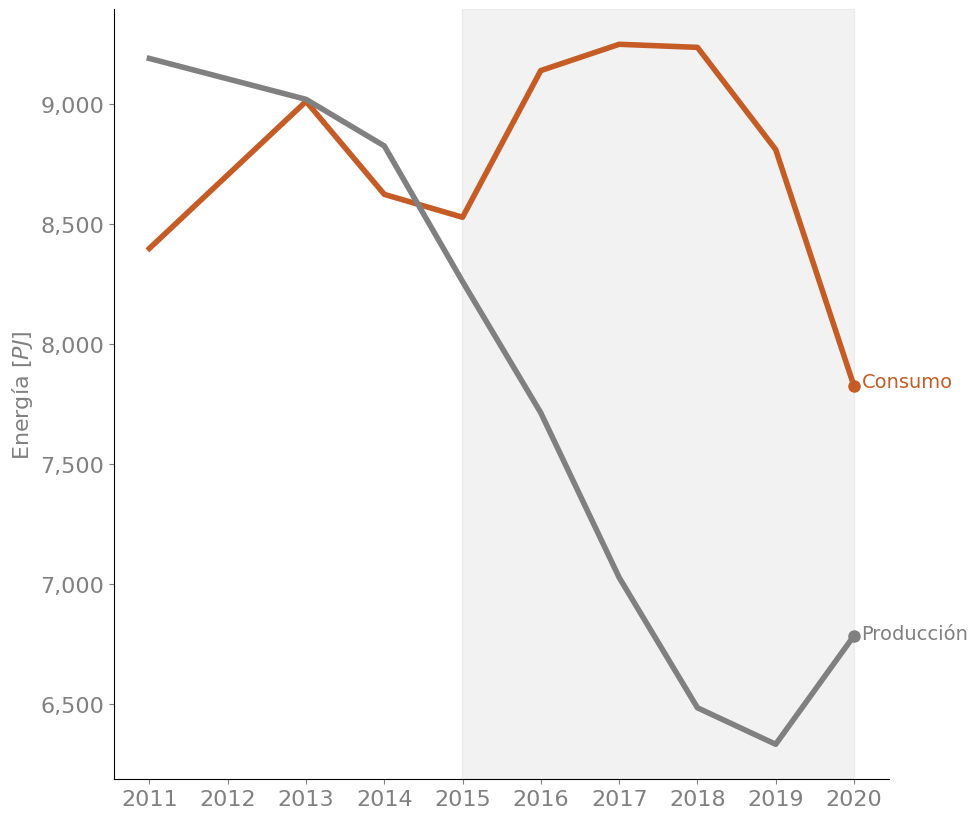

In [4]:
fig, ax = plt.subplots()
plt.style.use('../enerdata.mplstyle')

#Grafica datos
ax.plot(ind["Oferta Interna Bruta"],'-o',
        color=doradoier,label='Consumo',
        markevery=[-1])


ax.plot(ind["Producción"],'o-',label='Produccion',
       markevery=[-1])


#Separaci'on por medio de background
ax.axvspan(parse("2014-12-31"),
           parse("2019-12-31"),
           alpha=0.1,color='gray')

#Etiquetas y texto
ax.set_ylabel("Energía [$PJ$]")
ax.annotate('Producción', 
            (mdates.date2num(dt.datetime(2020, 1, 30)),6800), 
            xytext=(1,-5), 
            textcoords='offset points',size=14)
ax.annotate('Consumo', 
            (mdates.date2num(dt.datetime(2020, 1, 30)),7850), 
            xytext=(1,-5), 
            textcoords='offset points',size=14,
           color=doradoier)


# Formato de gr'afica
ax.xaxis.set_major_locator(mdates.YearLocator(base=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

fig.savefig('ConsumoProduccion.png')


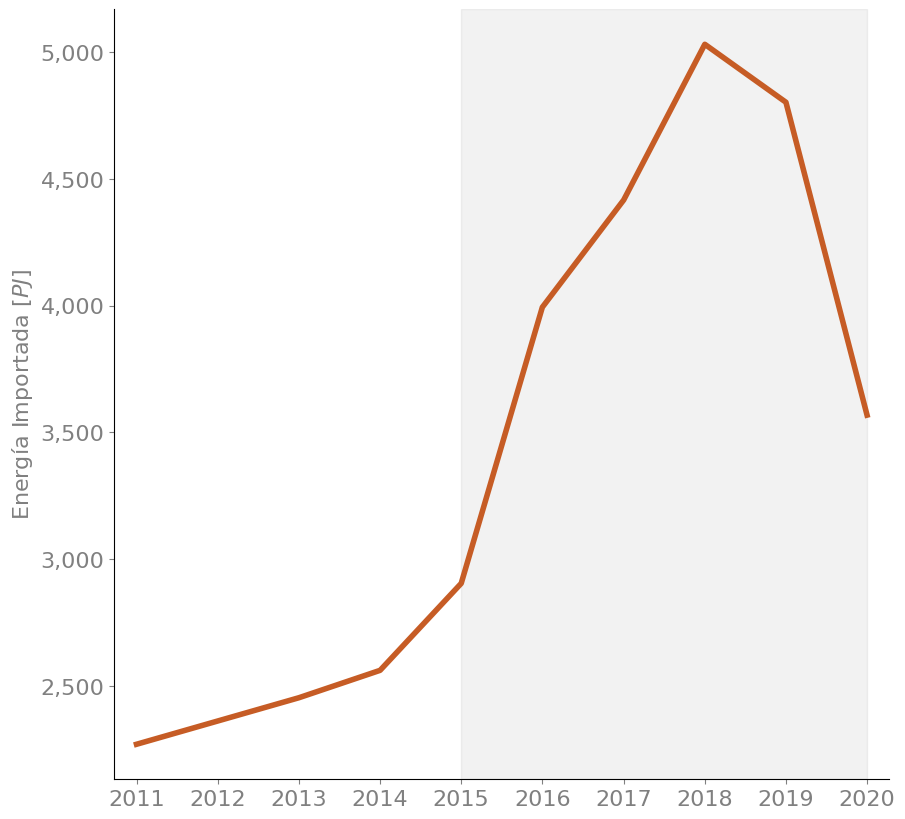

In [5]:
fig, ax = plt.subplots()

#Grafica datos
ax.plot(ind.Importación,color=doradoier)

#Fondo verde y rojo para separar a~nos
ax.axvspan(parse("2015-01-01"),
           parse("2020-01-01"),alpha=0.1,color='grey')

#L'imites en X y Y
ax.set_xlim(ind.index[0]-pd.Timedelta(100,"d"),ind.index[-1]+pd.Timedelta(100,"d"))
# ax.set_ylim(0,1.2)

#Etiquetas y texto
ax.set_ylabel("Energía Importada [$PJ$]")
# ax.set_xlabel("Año",c=azulier)


# Formato de gr'afica
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))



fig.savefig('Importacion.png')
